# From OCT to square patches
Create patches for training and validation. 

In [4]:
import sys
sys.path.insert(1,"../../2_Preprocessing_Code/amd/prl")
from buildDataset import *
%matplotlib inline
from helper_patches import *

In [5]:
X,y = getBalancedXYData(mode = 'raw',normmode = 'EQ-hist')
print(X.shape)
print(y.shape)
print(768*14*18)

(193536, 70)
(193536,)
193536


## Creating 70x70 patches

In [6]:
d = X.shape[1] #since the OCT image is rotated
X_reshape = X.reshape(-1, 768, 70)
y_reshape = y.reshape(-1, 768)
X_reshape.shape

(252, 768, 70)

patches of size: 70 x 70
stride of  1
threshold: 0.8
number of patches per OCT: 698
total number of patches:  146580
16745 patches were dropped because of their ratio.
There are 19297 labels equal to 1 (in the BCEA) and 110538 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/training/thresh=80/s=1/patches.NPY'>
patches of size: 70 x 70
stride of  1
threshold: 0.9
number of patches per OCT: 698
total number of patches:  146580
21181 patches were dropped because of their ratio.
There are 17675 labels equal to 1 (in the BCEA) and 107724 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/training/thresh=90/s=1/patches.NPY'>
patches of size: 70 x 70
stride of  2
threshold: 0.8
number of patches per OCT: 349
total number of patches:  73290
8357 patches were dropped because of their ratio.
There are 9659 labels equal to 1 (in the BCEA) and 55274 labels equal to 0.
labels and patches saved in fold

0.0

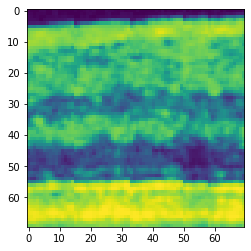

In [4]:
# for training, only take the first 15 patients
X_train = X_reshape[14*3:]
y_train = y_reshape[14*3:]

save_folder = "generated_patches/70x70/training"
for s in [1, 2, 4, 8, 16]:
    for thresh in [0.8, 0.9]:
        patches, labels = create_serial_patches(X_train, y_train, s, d, thresh=thresh, save_folder=save_folder)


plt.imshow(patches[4,:,:].T)
labels[4]

In [8]:
X_valid = X_reshape[:14*3]
y_valid = y_reshape[:14*3]

save_folder = "generated_patches/70x70/validation"
for s in [1, 2, 4, 8, 16]:
    for thresh in [0.8, 0.9]:
        patches, labels = create_serial_patches(X_valid, y_valid, s, d, thresh=thresh, save_folder=save_folder)

patches of size: 70 x 70
stride of  1
number of patches per OCT: 698
total number of patches:  29316
3518 patches were dropped because of their ratio.
There are 3402 labels equal to 1 (in the BCEA) and 22396 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/validation/thresh=80/s=1/patches.NPY'>
patches of size: 70 x 70
stride of  1
number of patches per OCT: 698
total number of patches:  29316
4460 patches were dropped because of their ratio.
There are 3048 labels equal to 1 (in the BCEA) and 21808 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/validation/thresh=90/s=1/patches.NPY'>
patches of size: 70 x 70
stride of  2
number of patches per OCT: 349
total number of patches:  14658
1756 patches were dropped because of their ratio.
There are 1703 labels equal to 1 (in the BCEA) and 11199 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/v

patches min: 0.007153420781893004
patches max: 1.0


0.0

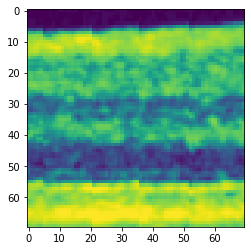

In [9]:
# to load the labels and patches: 
patches, labels = load_patches("generated_patches/training", 2)
print("patches min:", patches.min())
print("patches max:", patches.max())
plt.imshow(patches[4,:,:, 0].T)
labels[4]

(64933, 70, 70, 1)
1.0
0.018958905677655676
0.49052054716117216
[[-0.7878282  -0.81729674 -0.84550565 ...  0.8048363   0.7287736
   0.57766235]
 [-0.8604837  -0.84633774 -0.86422825 ...  0.83579826  0.7519462
   0.5931854 ]
 [-0.86422825 -0.86422825 -0.86422825 ...  0.7893784   0.6755167
   0.51237357]
 ...
 [-0.7338277  -0.2491681   0.50986636 ...  0.8910829   0.7852149
   0.5971073 ]
 [-0.7049053  -0.18394226  0.52466035 ...  0.85895205  0.69409
   0.46490514]
 [-0.689729   -0.2250871   0.37855685 ...  0.8759043   0.7216835
   0.52560174]]
imgs min: -0.9620822
imgs max: 1.0


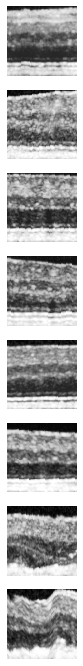

In [22]:
import matplotlib.pyplot as plt
print(patches.shape)

batch_size = 8
idx = np.random.randint(0, patches.shape[0], batch_size) # (low, high, size)
imgs = patches[idx]
imgs = (imgs.astype(np.float32) - 0.5) / 0.5
print(imgs[0,:,:,0])
print("imgs min:", imgs.min())
print("imgs max:", imgs.max())
r = batch_size
fig, axs = plt.subplots(r, figsize=(12,12))

cnt = 0
for i in range(r):
        axs[i].imshow(np.transpose(imgs[cnt,:,:,0]), cmap='gray', vmin=-1, vmax=1)
        axs[i].axis('off')
        cnt += 1

## Creating 128x128 patches
Resize the images from 768x70 to 1536x128

X_reshape.shape= (252, 768, 70)
X_resize.shape= (252, 768, 128)


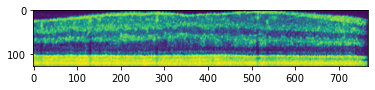

In [5]:
# resize the height of the images. We keep the same width so that we don't need to change the labels.
from cv2 import resize, INTER_CUBIC
print("X_reshape.shape=", X_reshape.shape)
X_resize = np.zeros((X_reshape.shape[0], X_reshape.shape[1], 128))
for i in range(X_reshape.shape[0]):
    X_resize[i] = resize(X_reshape[i], dsize=(128, X_reshape.shape[1]), interpolation=INTER_CUBIC)
print("X_resize.shape=", X_resize.shape)
plt.imshow(X_resize[8,:,:].T)

y_resize = y_reshape.copy()

patches of size: 128 x 128
stride of  2
threshold: 0.8
number of patches per OCT: 320
total number of patches:  67200
12765 patches were dropped because of their ratio.
There are 7418 labels equal to 1 (in the BCEA) and 47017 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/128x128/training/thresh=80/s=2/patches.NPY'>
patches of size: 128 x 128
stride of  2
threshold: 0.9
number of patches per OCT: 320
total number of patches:  67200
16933 patches were dropped because of their ratio.
There are 6440 labels equal to 1 (in the BCEA) and 43827 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/128x128/training/thresh=90/s=2/patches.NPY'>
patches of size: 128 x 128
stride of  4
threshold: 0.8
number of patches per OCT: 160
total number of patches:  33600
6384 patches were dropped because of their ratio.
There are 3716 labels equal to 1 (in the BCEA) and 23500 labels equal to 0.
labels and patch

0.0

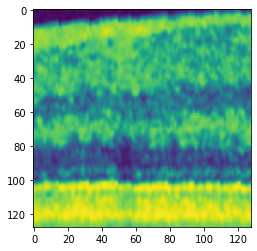

In [8]:
# for training, only take the first 15 patients
X_train = X_resize[14*3:]
y_train = y_resize[14*3:]
d = 128

save_folder = "generated_patches/128x128/training"
for s in [2, 4, 8, 16]:
    for thresh in [0.8, 0.9]:
        patches, labels = create_serial_patches(X_train, y_train, s, d, thresh=thresh, save_folder=save_folder)

plt.imshow(patches[4,:,:].T)
labels[4]

In [9]:
X_valid = X_resize[:14*3]
y_valid = y_resize[:14*3]
d = 128

save_folder = "generated_patches/128x128/validation"
for s in [1, 2, 4, 8, 16]:
    for thresh in [0.8, 0.9]:
        patches, labels = create_serial_patches(X_valid, y_valid, s, d, thresh=thresh, save_folder=save_folder)

patches of size: 128 x 128
stride of  1
threshold: 0.8
number of patches per OCT: 640
total number of patches:  26880
5512 patches were dropped because of their ratio.
There are 2648 labels equal to 1 (in the BCEA) and 18720 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/128x128/validation/thresh=80/s=1/patches.NPY'>
patches of size: 128 x 128
stride of  1
threshold: 0.9
number of patches per OCT: 640
total number of patches:  26880
7332 patches were dropped because of their ratio.
There are 2108 labels equal to 1 (in the BCEA) and 17440 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/128x128/validation/thresh=90/s=1/patches.NPY'>
patches of size: 128 x 128
stride of  2
threshold: 0.8
number of patches per OCT: 320
total number of patches:  13440
2753 patches were dropped because of their ratio.
There are 1326 labels equal to 1 (in the BCEA) and 9361 labels equal to 0.
labels and patc

## Creating 32x32 patches
Resize the images from 768x70 to 352x32


X_reshape.shape= (252, 768, 70)
X_resize.shape= (252, 768, 32)


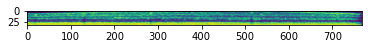

In [8]:
from cv2 import resize, INTER_CUBIC
print("X_reshape.shape=", X_reshape.shape)
X_resize = np.zeros((X_reshape.shape[0], X_reshape.shape[1], 32))
for i in range(X_reshape.shape[0]):
    X_resize[i] = resize(X_reshape[i], dsize=(32, X_reshape.shape[1]), interpolation=INTER_CUBIC)
print("X_resize.shape=", X_resize.shape)
plt.imshow(X_resize[8,:,:].T)

y_resize = y_reshape.copy()

c:\Users\line\Desktop\Mauro\4_GAN\CGAN\helper_patches.py:69: UserWarning: d cannot be bigger than the last dimension of X. Now d is set to X.shape[2].
  warnings.warn("d cannot be bigger than the last dimension of X. Now d is set to X.shape[2].")


patches of size: 32 x 32
stride of  2
threshold: 0.8
number of patches per OCT: 368
total number of patches:  77280
3900 patches were dropped because of their ratio.
There are 11885 labels equal to 1 (in the BCEA) and 61495 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/32x32/training/thresh=80/s=2/patches.NPY'>
patches of size: 32 x 32
stride of  2
threshold: 0.9
number of patches per OCT: 368
total number of patches:  77280
5046 patches were dropped because of their ratio.
There are 11324 labels equal to 1 (in the BCEA) and 60910 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/32x32/training/thresh=90/s=2/patches.NPY'>
patches of size: 32 x 32
stride of  4
threshold: 0.8
number of patches per OCT: 184
total number of patches:  38640
1959 patches were dropped because of their ratio.
There are 5947 labels equal to 1 (in the BCEA) and 30734 labels equal to 0.
labels and patches saved i

0.0

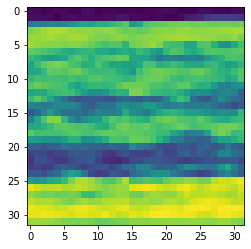

In [9]:
# for training, only take the first 15 patients
X_train = X_resize[14*3:]
y_train = y_resize[14*3:]
d = 128

save_folder = "generated_patches/32x32/training"
for s in [2, 4, 8, 16]:
    for thresh in [0.8, 0.9]:
        patches, labels = create_serial_patches(X_train, y_train, s, d, thresh=thresh, save_folder=save_folder)

plt.imshow(patches[4,:,:].T)
labels[4]

In [10]:
X_valid = X_resize[:14*3]
y_valid = y_resize[:14*3]
d = 128

save_folder = "generated_patches/32x32/validation"
for s in [1, 2, 4, 8, 16]:
    for thresh in [0.8, 0.9]:
        patches, labels = create_serial_patches(X_valid, y_valid, s, d, thresh=thresh, save_folder=save_folder)

patches of size: 32 x 32
stride of  1
threshold: 0.8
number of patches per OCT: 736
total number of patches:  30912
1592 patches were dropped because of their ratio.
There are 4320 labels equal to 1 (in the BCEA) and 25000 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/32x32/validation/thresh=80/s=1/patches.NPY'>
patches of size: 32 x 32
stride of  1
threshold: 0.9
number of patches per OCT: 736
total number of patches:  30912
2084 patches were dropped because of their ratio.
There are 4080 labels equal to 1 (in the BCEA) and 24748 labels equal to 0.
labels and patches saved in folder  <_io.BufferedWriter name='generated_patches/32x32/validation/thresh=90/s=1/patches.NPY'>
patches of size: 32 x 32
stride of  2
threshold: 0.8
number of patches per OCT: 368
total number of patches:  15456
798 patches were dropped because of their ratio.
There are 2159 labels equal to 1 (in the BCEA) and 12499 labels equal to 0.
labels and patches saved 

In [12]:
print(patches.min())
print(patches.max())

-0.03864001633472444
1.0453224153229095


## Applying edge enhancing filters
- sobel filter
- canny filter

In [29]:
from scipy import ndimage as ndi
from skimage import feature

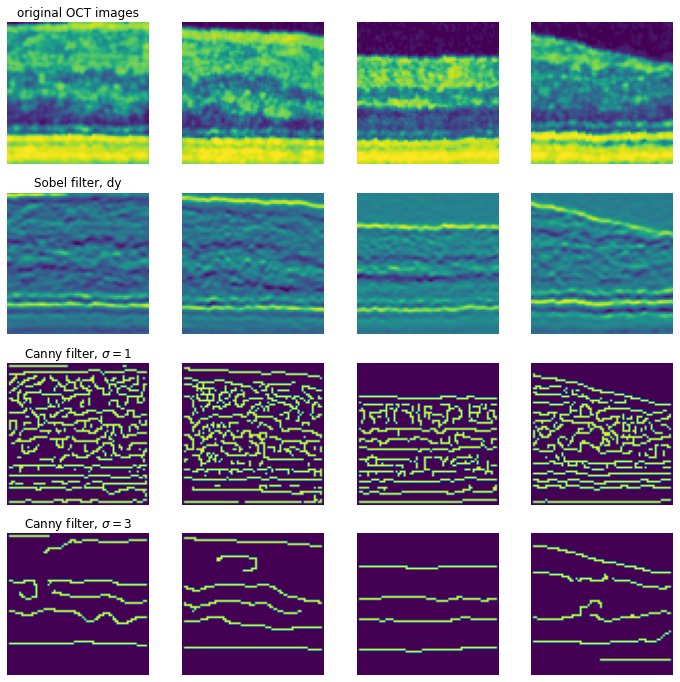

In [44]:
n_samples = 4
idx = np.random.randint(0, patches.shape[0], n_samples)
samples = patches[idx,:,:, 0]
n_filters = 4
fig, axs = plt.subplots(n_filters, n_samples, figsize=(12,12))
cnt = 0
for j in range(n_samples):
    axs[0,j].imshow(samples[cnt].T)
    axs[0,j].axis('off')

    axs[1,j].imshow(ndi.sobel(samples[cnt], 1).T)
    axs[1,j].axis('off')

    axs[2,j].imshow(feature.canny(samples[cnt],sigma=1).T)
    axs[2,j].axis('off')

    axs[3,j].imshow(feature.canny(samples[cnt],sigma=3).T)
    axs[3,j].axis('off')

    if j==0:
        axs[0,j].set_title("original OCT images")
        axs[1,j].set_title("Sobel filter, dy")
        axs[2,j].set_title(r"Canny filter, $\sigma=1$")
        axs[3,j].set_title(r"Canny filter, $\sigma=3$")

    cnt += 1